In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def write_excel(df,name="output.xlsx"):
    """Writes the DataFrame to an Excel file."""
    df.to_excel(name, index=False)

In [3]:
df = pd.read_excel('flight_price.xlsx')

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
x = df[['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info']]

In [6]:
y = df['Price']

<Axes: xlabel='Price', ylabel='count'>

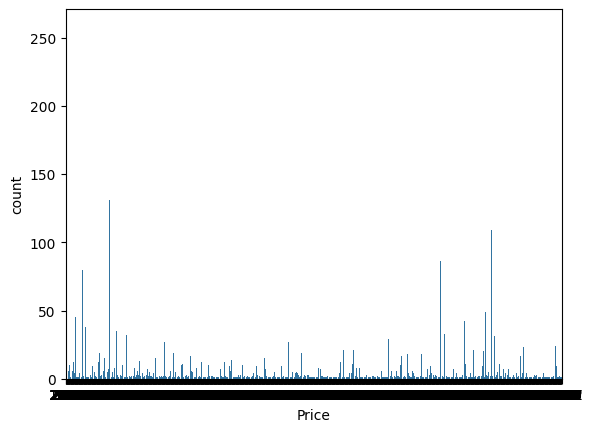

In [7]:
sns.countplot(data=df, x='Price')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder(sparse_output=False)

In [14]:
encoder_array = encoder.fit_transform(df[['Airline']])
encoder_cols = encoder.get_feature_names_out(['Airline'])

In [15]:
encode_df_airline = pd.DataFrame(encoder_array, columns=encoder_cols)

In [16]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)

<Axes: xlabel='Airline', ylabel='Price'>

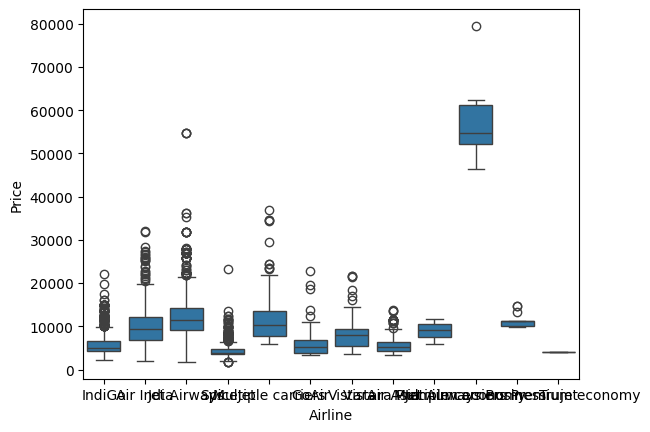

In [17]:
sns.boxplot(data=df, x='Airline', y='Price')

2025-10-26 11:44:23.853 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2025-10-26 11:44:23.859 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.0)
2025-10-26 11:44:23.860 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2025-10-26 11:44:23.888 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=0.0)
2025-10-26 11:44:23.891 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.0)
2025-10-26 11:44:23.908 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0)
2025-10-26 11:44:23.923 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.0)
2025-10-26 11:44:23.972 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.0)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,1.059268e-08,6359.066122,6373.618940,inf,0.070498,1.298042e-46
lognorm,1.150540e-08,3267.044838,3288.874065,inf,0.075144,6.595617e-53
gamma,1.316505e-08,6611.098505,6632.927732,inf,0.071946,1.566021e-48
chi2,1.332854e-08,6536.643148,6558.472375,inf,0.066475,1.730898e-41
norm,1.378528e-08,8925.180619,8939.733437,inf,0.077270,6.365962e-56


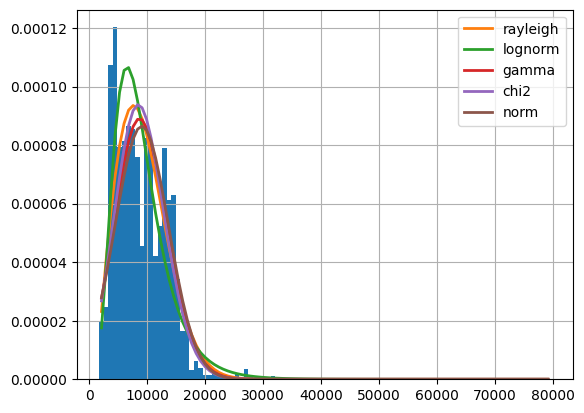

In [18]:
from fitter import Fitter,get_common_distributions
f = Fitter(df['Price'], distributions=get_common_distributions())
f.fit()
f.summary()

In [19]:
groups = [df['Price'][df['Airline'] == cat] for cat in df['Airline'].unique()]


In [20]:
from scipy.stats import kruskal

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis Statistic: {stat:.8f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 4870.59376902, p-value: 0.0000


In [21]:
airline_encode = OneHotEncoder(sparse_output=False)
airline_encoder_array = airline_encode.fit_transform(df[['Airline']])
airline_encoder_cols = airline_encode.get_feature_names_out(['Airline'])    
encode_df_airline = pd.DataFrame(airline_encoder_array, columns=airline_encoder_cols)

In [22]:
write_excel(encode_df_airline,name="flight_output.xlsx")

In [23]:
source_groups = [df['Price'][df['Source'] == cat] for cat in df['Source'].unique()]

In [24]:
stat, p  = kruskal(*source_groups)
print(f"Kruskal-Wallis Statistic: {stat:.8f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 2348.88228472, p-value: 0.0000


In [25]:
destination_groups = [df['Price'][df['Destination'] == cat] for cat in df['Destination'].unique()]
stat, p  = kruskal(*destination_groups)
print(f"Kruskal-Wallis Statistic: {stat:.8f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 3379.66996897, p-value: 0.0000


In [26]:
source_encode = OneHotEncoder(sparse_output=False)
source_encoder_array = source_encode.fit_transform(df[['Source']])
source_encoder_cols = source_encode.get_feature_names_out(['Source'])
encode_df_source = pd.DataFrame(source_encoder_array, columns=source_encoder_cols)

In [27]:
destination_encode = OneHotEncoder(sparse_output=False)
destination_encoder_array = destination_encode.fit_transform(df[['Destination']])
destination_encoder_cols = destination_encode.get_feature_names_out(['Destination'])
encode_df_destination = pd.DataFrame(destination_encoder_array, columns=destination_encoder_cols)

In [28]:
write_excel(encode_df_source,name="source.xlsx")
write_excel(encode_df_destination,name="destination.xlsx")

In [29]:
df['dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['dep_hour'] = df['dep_hour'].astype(int)

In [30]:
df['dep_minute'] = df['Dep_Time'].str.split(':').str[1]
df['dep_minute'] = df['dep_minute'].astype(int)

In [31]:
df.drop(['Dep_Time'], axis=1, inplace=True)

In [33]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [35]:
source_groups = [df['Price'][df['Source'] == cat] for cat in df['Source'].unique()]
stat, p  = kruskal(*source_groups)
print(f"Kruskal-Wallis Statistic: {stat:.8f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 2348.88228472, p-value: 0.0000


In [36]:
destination_groups = [df['Price'][df['Destination'] == cat] for cat in df['Destination'].unique()]
stat, p  = kruskal(*destination_groups)
print(f"Kruskal-Wallis Statistic: {stat:.8f}, p-value: {p:.4f}")

Kruskal-Wallis Statistic: 3379.66996897, p-value: 0.0000


In [ ]:
duration_hours = df['Duration'].str.split(' ').str[0]
duration_hours = duration_hours.str.replace('h','')


AttributeError: 'str' object has no attribute 'astype'

In [45]:
duration_minutes = df['Duration'].str.split(' ').str[1]
duration_minutes = duration_minutes.str.replace('m','')

In [46]:
duration_df = pd.DataFrame(columns=['Duration_hours','Duration_minutes'])
duration_df['Duration_hours'] = duration_hours
duration_df['Duration_minutes'] = duration_minutes

In [47]:
write_excel(duration_df,name="duration.xlsx")

In [49]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [50]:
df.drop(['Route'], axis=1, inplace=True)

In [51]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year', 'dep_hour', 'dep_minute'],
      dtype='object')

In [52]:
df.drop(['Date_of_Journey','Source','Destination','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)

In [54]:
df.drop(['Airline'], axis=1, inplace=True)

In [57]:
df_flight= pd.read_excel('flight_output.xlsx')
df_destination = pd.read_excel('destination.xlsx')
df_source = pd.read_excel('source.xlsx')
df_duration = pd.read_excel('duration.xlsx')

In [58]:
df = pd.concat([df,df_flight,df_source,df_destination,df_duration], axis=1)

In [59]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'dep_hour',
       'dep_minute', 'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [60]:
write_excel(df, name="flight_data_cleaned.xlsx")

In [63]:
df['Duration_minutes'].fillna(0, inplace=True)

/tmp/ipykernel_824/821776089.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration_minutes'].fillna(0, inplace=True)


In [64]:
write_excel(df,name="flight_output.xlsx")